<a href="https://colab.research.google.com/github/Bartho-A/MyJupyterNotebooks/blob/main/Paris_Olympics_Medals_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paris Olympics Medals Data Analytics

# import data with pandas

In [ ]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file
file_path = '/Users/bartholomeowayinbilaa-obe/Downloads/paris_olympics_2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(df.head())

  Competitions Rank             NOC  Gold  Silver  Bronze  Total
0      Archery    1     South Korea     5       1       1      7
1      Archery    2         France*     0       1       1      2
2      Archery    3   United States     0       1       1      2
3      Archery    4           China     0       1       0      1
4      Archery    5         Germany     0       1       0      1


# import necessary packages

In [ ]:
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(f"Rows: {df.shape[0]:,}")
print(f"Cols: {df.shape[1]:,}")
print(df.dtypes)
df.head(3)

Rows: 454
Cols: 7
Competitions    object
Rank            object
NOC             object
Gold             int64
Silver           int64
Bronze           int64
Total            int64
dtype: object


,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2


In [ ]:
print(f"""The summer olympics in Paris 🇫🇷
    ... contained {df['Competitions'].nunique()} competitions.
    ... featured participation from {df['NOC'].nunique()} countries.""")

print(f"\n{10*'='} Medal Description {10*'='}")
desc = df.describe()
desc.loc['unique'] = df.nunique()
desc

The summer olympics in Paris 🇫🇷 
    ... contained 35 competitions.
    ... featured participation from 93 countries.

========== Medal Description ==========


,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000
unique,9.000000,10.000000,9.000000,15.000000


In [ ]:
df['NOC'] = df['NOC'].str.strip().str.replace(r'[^\w\s]', '', regex=True)
df['Country_Flag'] = df['NOC'].apply(lambda country: pycountry.countries.get(name=country).flag if pycountry.countries.get(name=country) else None)
print(f"The flag for {df[df.Country_Flag.isnull()].shape[0]} countries couldn't be found.")
df.head(5)

The flag for 60 countries couldn't be found.


,Competitions,Rank,NOC,Gold,Silver,Bronze,Total,Country_Flag
0,Archery,1,South Korea,5,1,1,7,None
1,Archery,2,France,0,1,1,2,🇫🇷
2,Archery,3,United States,0,1,1,2,🇺🇸
3,Archery,4,China,0,1,0,1,🇨🇳
4,Archery,5,Germany,0,1,0,1,🇩🇪


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from fuzzywuzzy import process

sns.set(style="white")


/Users/bartholomeowayinbilaa-obe/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
no_flag_rows = df[df['Country_Flag'].isnull()]
all_countries = [country.name for country in pycountry.countries]

def get_closest_country_name(noc_name):
    best_match, score = process.extractOne(noc_name, all_countries)
    return best_match if score >= 30 else None

df.loc[df['Country_Flag'].isnull(), 'Country_Flag'] = no_flag_rows['NOC'].apply(
    lambda noc_name: pycountry.countries.get(name=get_closest_country_name(noc_name)).flag)
print(f"The flag for {df[df.Country_Flag.isnull()].shape[0]} countries couldn't be found.")

df.head(5)

The flag for 0 countries couldn't be found.


,Competitions,Rank,NOC,Gold,Silver,Bronze,Total,Country_Flag
0,Archery,1,South Korea,5,1,1,7,🇰🇷
1,Archery,2,France,0,1,1,2,🇫🇷
2,Archery,3,United States,0,1,1,2,🇺🇸
3,Archery,4,China,0,1,0,1,🇨🇳
4,Archery,5,Germany,0,1,0,1,🇩🇪


# Top Countries by Medals Won

In [ ]:
medal_summary = df.groupby('NOC').agg(
    Total_Medals=('Total', 'sum'),
    Gold_Medals=('Gold', 'sum'),
    Silver_Medals=('Silver', 'sum'),
    Bronze_Medals=('Bronze', 'sum')
).reset_index()

medal_summary = medal_summary.sort_values(by='Total_Medals', ascending=False).reset_index(drop=True)
medal_summary = pd.merge(medal_summary, df[['NOC', 'Country_Flag']].drop_duplicates(subset=['NOC']), on='NOC', how='left')
medal_summary.head()

,NOC,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Country_Flag
0,United States,126,40,44,42,🇺🇸
1,China,91,40,27,24,🇨🇳
2,Great Britain,65,14,22,29,🇧🇭
3,France,64,16,26,22,🇫🇷
4,Australia,53,18,19,16,🇦🇺


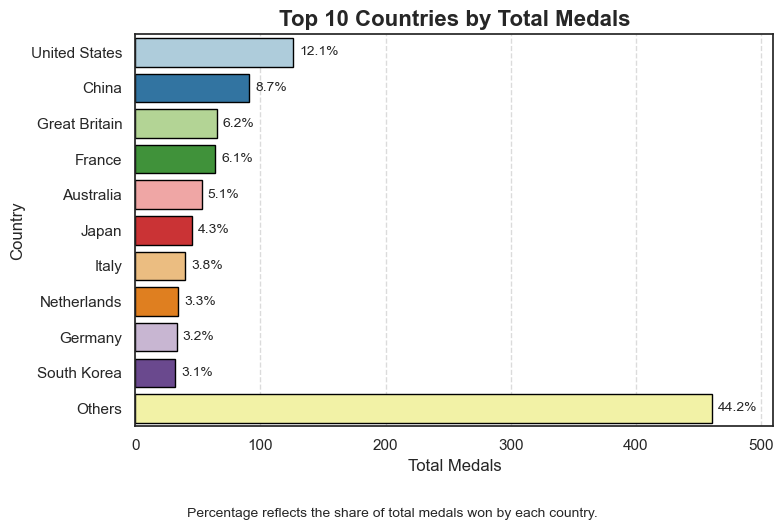

In [ ]:
# Top countries by overall medals won #

TOP_N = 10

temp = medal_summary.head(TOP_N)

remaining_medals = medal_summary.iloc[TOP_N:].Total_Medals.sum()

others_df = pd.DataFrame({'NOC': ['Others'], 'Total_Medals': [remaining_medals]})
temp = pd.concat([temp, others_df], ignore_index=True)

total_medals = temp.Total_Medals.sum()
temp['Percentage'] = (temp.Total_Medals / total_medals) * 100

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=temp,
    y='NOC',
    x='Total_Medals',
    palette='Paired',
    edgecolor='black',
    ax=ax
)

ax.set_title(f'Top {TOP_N} Countries by Total Medals', fontsize=16, weight='bold')
ax.set_xlabel('Total Medals', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.yticks(rotation=0)
plt.xlim((0, 510))

ax.grid(axis='x', linestyle='--', alpha=0.7)

for index, row in temp.iterrows():
    ax.text(row.Total_Medals + 5, index, f'{row.Percentage:.1f}%', va='center', fontsize=10)

plt.figtext(0.5, -0.05, 'Percentage reflects the share of total medals won by each country.',
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

# Medal Buckets

In [ ]:
nr_countries_without_any_medals = medal_summary[medal_summary['Total_Medals']==0].shape[0]
print(f"There were {nr_countries_without_any_medals} countries who did not win any medals.")

There were 0 countries who did not win any medals.


In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

medal_summary['Medal_Range'] = pd.cut(medal_summary['Total_Medals'], bins=bins, labels=labels, right=False)
medal_count_summary = medal_summary.groupby('Medal_Range').size().reset_index(name='Number_of_Countries')
medal_count_summary['Share_of_Countries'] = round(100 * medal_count_summary['Number_of_Countries'] / medal_count_summary['Number_of_Countries'].sum(), 3)
medal_count_summary['Cumulative_Share'] = medal_count_summary['Share_of_Countries'].cumsum()

medal_count_summary

,Medal_Range,Number_of_Countries,Share_of_Countries,Cumulative_Share
0,0-4,45,48.913,48.913
1,5-9,26,28.261,77.174
2,10-14,7,7.609,84.783
3,15-19,2,2.174,86.957
4,20-24,2,2.174,89.131
5,25-29,1,1.087,90.218
6,30-34,3,3.261,93.479
7,35-39,0,0.000,93.479
8,40-49,2,2.174,95.653
9,50-59,1,1.087,96.740


- More than 77% of all countries won less than 10 medals.
- This means, only 1 out of 4 countries won 10 or more medals
- Only 10% of all countries won at least 30 medals.

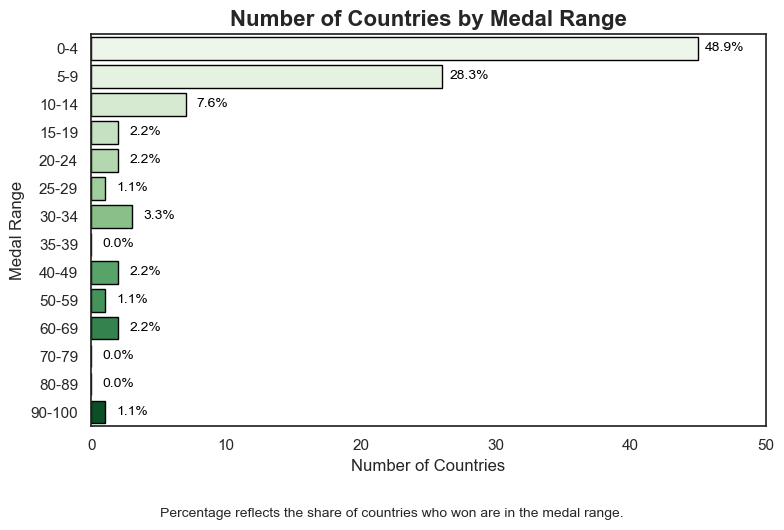

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(medal_count_summary, y='Medal_Range', x='Number_of_Countries',
                 palette='Greens', edgecolor='black');
plt.title('Number of Countries by Medal Range', fontsize=16, weight='bold')
plt.xlabel('Number of Countries');
plt.ylabel('Medal Range');
plt.xlim((0, 50));
plt.yticks(rotation=0);

for index, row in medal_count_summary.iterrows():
    ax.text(row['Number_of_Countries'] + 2.0, index, f"{row['Share_of_Countries']:.1f}%",
            fontsize=10, color='black', ha="center", va="center")

plt.figtext(0.5, -0.05, 'Percentage reflects the share of countries who won are in the medal range.',
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show();

## Investigating Competitions
In this section we are going to investigate the won medals by discipline.

In [ ]:
df.head(3)

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total,Country_Flag
0,Archery,1,South Korea,5,1,1,7,🇰🇷
1,Archery,2,France,0,1,1,2,🇫🇷
2,Archery,3,United States,0,1,1,2,🇺🇸


In [ ]:
df.columns

Index(['Competitions', 'Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Country_Flag'],
      dtype='object')

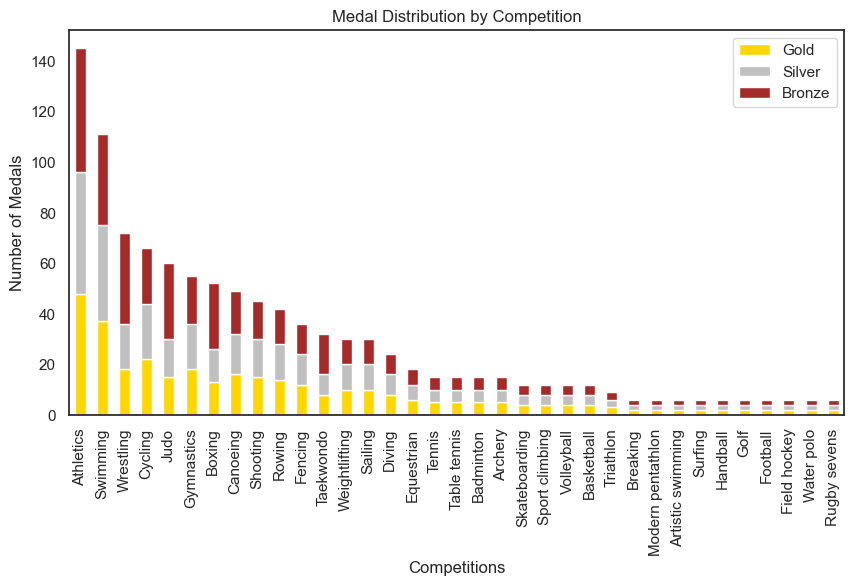

In [ ]:
# --- Prepare ---
competition_medals = df.groupby('Competitions')[['Gold', 'Silver', 'Bronze']].sum()
competition_medals['Total'] = competition_medals.sum(axis=1)
competition_medals = competition_medals.sort_values(by='Total', ascending=False)
competition_medals = competition_medals.drop(columns='Total')

# --- Visualize---
competition_medals.plot(kind='bar', stacked=True, figsize=(10, 5), color=['gold', 'silver', 'brown'])
plt.title('Medal Distribution by Competition')
plt.ylabel('Number of Medals')
plt.xlabel('Competitions')
plt.xticks(rotation=90)
plt.show()

- With 140 overall medals, Athletics is the competition with the highest number of medals.
- With more than 115 medals, Swimming is the competition with the 2nd highest number of medals.
- Suprisingly to me, with more than 70, Wrestling has the 3rd highest number of medals.
    - Furthermore, Wrestling, Boxing & Taekwondo have the highest share of 🥉 Bronze Medals compared to all other competitions. I think this is because everyone who lost the semi-final get's a 🥉 bronze medal in olympic fighting sports.

# Top Performing Countries by Competition.

In [ ]:
top_countries_per_competition = df.groupby(['Competitions', 'NOC'])['Total'].sum().reset_index()
top_countries_per_competition = top_countries_per_competition.sort_values(['Competitions', 'Total'], ascending=[True, False])
top_countries_per_competition.head(3)

,Competitions,NOC,Total
4,Archery,South Korea,7
1,Archery,France,2
6,Archery,United States,2


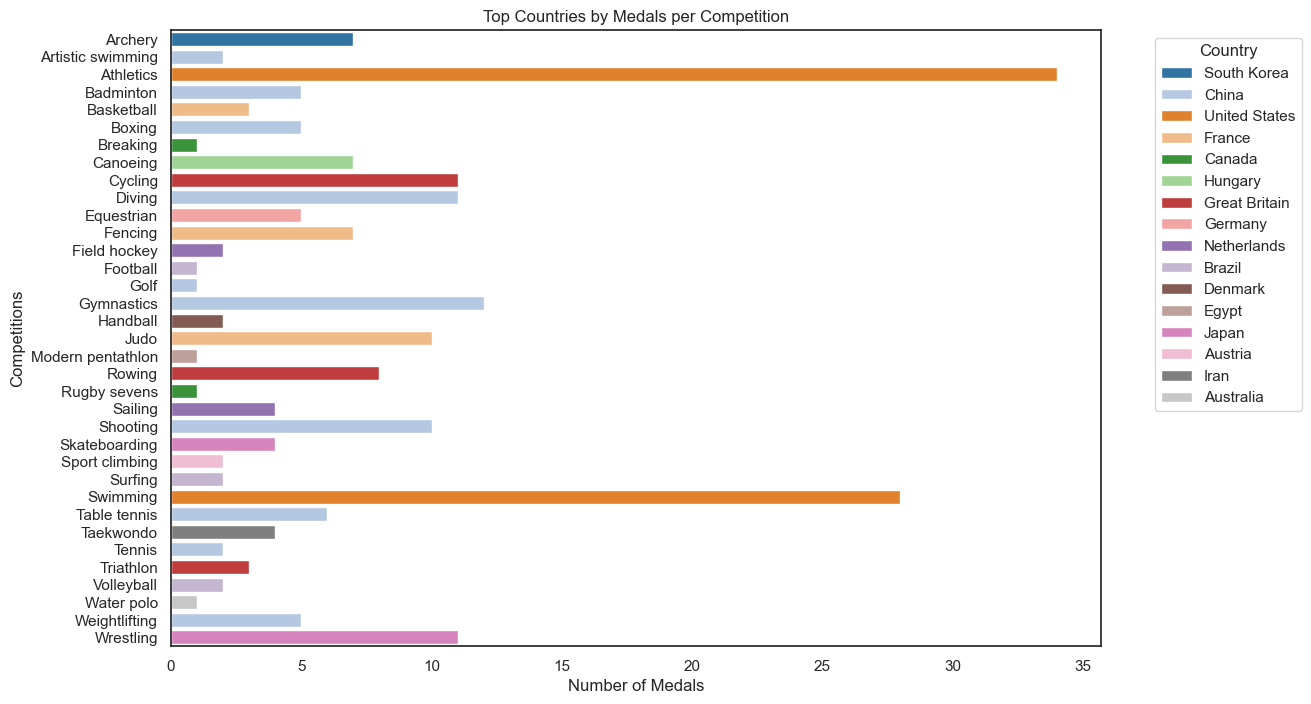

In [ ]:
# --- Prepare ---
palette = sns.color_palette("tab20", n_colors=len(top_countries_per_competition['Competitions'].unique()))

top_countries_per_competition = df.groupby(['Competitions', 'NOC'])['Total'].sum().reset_index()
top_countries_per_competition = top_countries_per_competition.sort_values(['Competitions', 'Total'], ascending=[True, False])
top_countries_per_competition = top_countries_per_competition.drop_duplicates(subset=['Competitions'], keep='first')

# --- Visualize ---
plt.figure(figsize=(12, 8))
sns.barplot(y='Competitions', x='Total', hue='NOC', data=top_countries_per_competition, dodge=False, palette=palette)
plt.title('Top Countries by Medals per Competition')
plt.xlabel('Number of Medals')
plt.ylabel('Competitions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
print(f"Countries with the most won medals per competition.")
print("===================================================\n")
for index, row in top_countries_per_competition.sort_values(['NOC']).iterrows():
    comp = row['Competitions']
    noc = row['NOC']
    flag = df[df['NOC']==noc]['Country_Flag'].unique()[0]

    print(f"{comp:20}  {flag}{noc:15} won {row['Total']:3.0f} medals.")

Countries with the most won medals per competition.

Water polo            🇦🇺Australia       won   1 medals.
Sport climbing        🇦🇹Austria         won   2 medals.
Football              🇧🇷Brazil          won   1 medals.
Surfing               🇧🇷Brazil          won   2 medals.
Volleyball            🇧🇷Brazil          won   2 medals.
Breaking              🇨🇦Canada          won   1 medals.
Rugby sevens          🇨🇦Canada          won   1 medals.
Tennis                🇨🇳China           won   2 medals.
Shooting              🇨🇳China           won  10 medals.
Weightlifting         🇨🇳China           won   5 medals.
Gymnastics            🇨🇳China           won  12 medals.
Golf                  🇨🇳China           won   1 medals.
Table tennis          🇨🇳China           won   6 medals.
Diving                🇨🇳China           won  11 medals.
Boxing                🇨🇳China           won   5 medals.
Badminton             🇨🇳China           won   5 medals.
Artistic swimming     🇨🇳China           won   2 med

- Interestingly, the USA 🇺🇸, who we saw is the country with the most overall won medals, only won the most medals in two competitions. But as we saw in Section "Medal Distribution by Competition" these competitions are also the competitions in which athletes can win the most medals, namely Athletics and Swimming.
- The country with the most occurences in the list of countries with the most won medals by competition is China 🇨🇳.

In [ ]:
100*top_countries_per_competition['NOC'].value_counts(normalize=True)

NOC
China            28.571429
France            8.571429
Great Britain     8.571429
Brazil            8.571429
United States     5.714286
Canada            5.714286
Netherlands       5.714286
Japan             5.714286
South Korea       2.857143
Hungary           2.857143
Germany           2.857143
Denmark           2.857143
Egypt             2.857143
Austria           2.857143
Iran              2.857143
Australia         2.857143
Name: proportion, dtype: float64

- In more than 28% of all competitions China 🇨🇳 was the country which won the most medals in that competition.
- The USA 🇺🇸 however, was in less than 6% of all competitions the country which won the most medals.

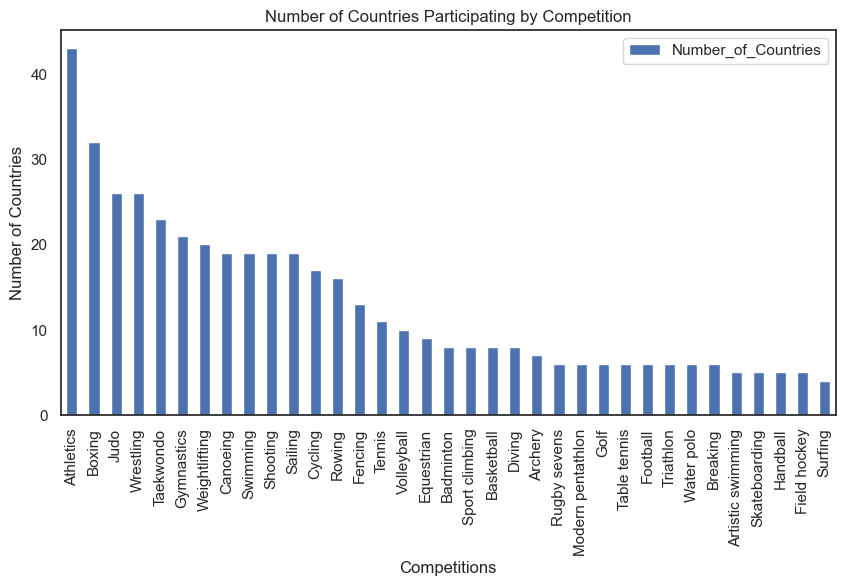

In [ ]:
# --- Prepare ---
participation_count = df.groupby('Competitions')['NOC'].nunique().reset_index()
participation_count.columns = ['Competitions', 'Number_of_Countries']
participation_count = participation_count.sort_values(by='Number_of_Countries', ascending=False)
participation_count.plot(kind='bar', x='Competitions', y='Number_of_Countries', figsize=(10, 5))

# --- Visualize ---
plt.title('Number of Countries Participating by Competition')
plt.ylabel('Number of Countries')
plt.xlabel('Competitions')
plt.xticks(rotation=90)
plt.show()